In [1]:
import numpy as np
import matplotlib as mpl
from numpy import linalg as alg
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
import random
import tensorflow as tf

# Matrix Algebra

In [2]:
M       = np.array
MO      = np.zeros
t       = np.transpose
I       = np.identity
reshape = np.reshape
o       = np.multiply
x       = np.dot
pow     = alg.matrix_power
inv     = alg.inv
det     = alg.det

rows    = lambda M : np.size(M, 0)
cols    = lambda M : np.size(M, 1)

In [3]:
def matrixRound(M, n):
    r = rows(M)
    c = cols(M)
    M = M.flatten()
    for i in range(0, len(M)):
        M[i] = round(M[i],n)
    M = reshape(M,(r,c))
    return M


In [4]:
def randomM(d1,d2,_round = 0, factor = 10):
    M = np.random.rand(d1,d2)
    M = M * factor
    M = matrixRound(M,_round)
    return M

In [5]:
def gauss(M):
    Mprime = M.copy()
    c = cols(M)-1
    for i in range(0, c):
        for j in range(0, c-i):
            Mprime[c-j,:] = Mprime[c-j-1,i]*Mprime[c-j,:] - Mprime[c-j,i]*Mprime[c-j-1,:] 
    return Mprime

In [6]:
def r(M):
    A = M.copy()
    A = gauss(A)
    if(cols(A)>rows(A)):
        ran = rows(A)
    else:
        ran = cols(A)
    c = ran
    
    for i in range(0, c):
        n = 0
        
        for j in range(0, c):
            if(A[i,j] == 0):
                n = n+1
                
            if(n == c):
                ran = ran -1
            
    return ran 
            

In [7]:
def Cramer(M,b, log = True):
    X = np.zeros(cols(M))
    detM = det(M)
    unknow = ['x','y','z','t']
    
    for i in range(0, len(X)):
        Mx = M.copy()
        Mx[:,i] = t(b)
        detMx = det(Mx)
        X[i] = detMx/detM
        
        if(log):
            if(len(X) <= len(unknow)):
                print(unknow[i], ' = ', X[i])
            else:
                print('x[',i,'] = ', X[i])
    return X

In [8]:
def solve(M, b = 0, cramer = True, log = True):
    E = 'E: wrong dimensions: vector B must have number of terms equal to rows number of A.'
    if(type(b) == int):
        b = np.zeros((rows(M)))   
    if(cramer):
        if(len(b) == rows(M)):
            print('solved')
            return Cramer(M, b, log)
        elif(len(t(b)) == rows(M)):
            print('solved with transposed b')
            return Cramer(M, t(b), log)
        else:
            print(E)
            
    else:
        if(len(b) == rows(M)):
            print('solved with numpy')
            return alg.solve(M, b)
        elif(len(t(b)) == rows(M)):
            print('solved with numpy and transposed b')
            return alg.solve(M, t(b))
        else:
            print(E)
    

# Geometry

In [9]:
#mpl.rcParams['legend.fontsize'] = 15

#fig = plt.figure()
#ax = fig.gca(projection='3d')
#theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
#z = np.linspace(-2, 2, 100)
#r = z**3 + 5
#x = r * np.sin(theta)
#y = r * np.cos(theta)
#ax.plot(x, y, z, label='parametric curve')
#ax.legend()

#plt.show()

In [10]:
def pointsTOmatrix(points):
    p = MO((len(points),points[0].dimensions))
    for i in range(0, len(points)):
        p[i,:] = points[i].coordinates
        
    return p

def draw2DPoints(points):
    p = pointsTOmatrix(points)
    for i in range(0, len(points)):
        x = p[i,0]
        y = p[i,1]
        plt.scatter(x, y, s=20)


def draw3DPoints(points):
    p = pointsTOmatrix(points)
    fig = plt.figure()
    ax = Axes3D(fig)

    x = list(p[:,0])
    y = list(p[:,1])
    z = list(p[:,2])

    ax.scatter(x,y,z)
    plt.show()
    
    
class P:

    def __init__(self, coordinates, log = False):
        self.coordinates = coordinates
        self.dimensions = int(len(coordinates))

        if(log):
            self.infoDisplay()
            self.draw()
            
    def infoDisplay(self):
        print('object: ', P)
        print('P',self.coordinates)
        print('dimensions = ',self.dimensions)
        
    def draw(self, multidimensionalRepresentation = '2D'):
        
        if (self.dimensions < 4):
            metaP = P(self.coordinates)
            if(self.dimensions == 3):
                draw3DPoints([metaP])
            elif(self.dimensions == 2):
                draw2DPoints([metaP])
                
        elif(multidimensionalRepresentation == '2D'):
            #here goues function to draw multiple dimensions
            it = self.dimensions/2
            if(str(it-int(it))[1:] == '.0'):
                it = int(it)
            if(type(it) == int):
                metaP = []
                d = 0
                for i in range(0, it):
                    metaP.append(P([self.coordinates[d], self.coordinates[d+1]]))
                    draw2DPoints([metaP[i]])
                    print(metaP[i].coordinates)
                    d += 2
                print('-------')
                print(metaP)


object:  <class '__main__.P'>
P [2, 2, 7, 5, 8, 6]
dimensions =  6
[2, 2]
[7, 5]
[8, 6]
-------
[<__main__.P object at 0x000001A90C34D0F0>, <__main__.P object at 0x000001A90C606CC0>, <__main__.P object at 0x000001A90C6200B8>]


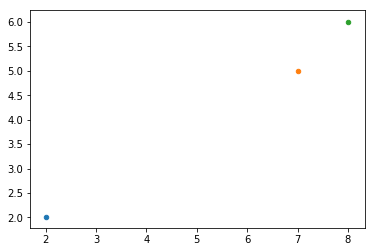

In [11]:
c = P([2,2,7,5,8,6], log = True)
a = P([1,1])
b= P([0,4])
#draw2DPoints([c])
#draw3DPoints([c])
#a.draw()
#print(c.dimensions)